# Rock Shi

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Google Play Store

1.0 % of data is missing!
Total missing values =  1487


0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

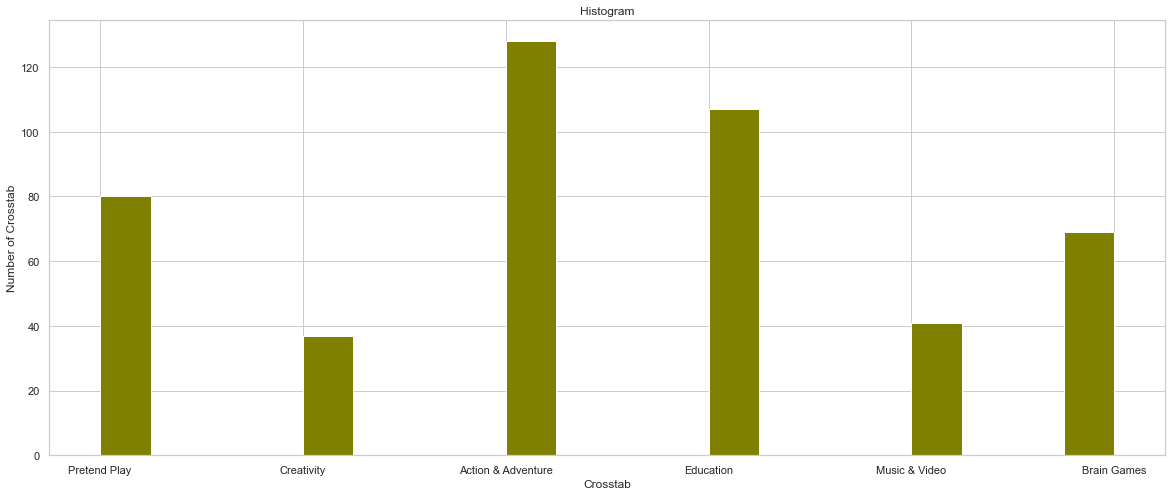

array(['Free', 'Paid', nan, '0'], dtype=object)

In [368]:
google_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/google_playstore_apps.csv')

#part a
missing_data = 0
for i in google_df.isnull().sum():
    missing_data += i

percentage_data_missing = missing_data / (len(google_df.axes[0]) * len(google_df.axes[1]))
print(round(percentage_data_missing, 2) * 100,'% of data is missing!')
print('Total missing values = ',missing_data)

#part b
display(google_df.duplicated())

#part c
google_df.drop_duplicates(inplace = True)

#part d
google_df['Size'].replace('Varies with device', np.nan, inplace = True)

#part e
google_df['Size'].replace({'M':''}, regex=True, inplace = True)

#part f
google_df['Installs'] = google_df['Installs'].str.replace(r'\D', '')

#part g
google_df['Android Ver'].replace('Varies with device', np.nan, inplace = True)
google_df['Android Ver'] = google_df['Android Ver'].str.replace(r' and up', '')

#part h
google_df['Price'] = google_df['Price'].str.replace(r'$', '')
google_df['Price'].replace('Everyone', np.nan, inplace = True)

#part i
google_df['Installs'] = pd.to_numeric(google_df['Installs'])
google_df['Price'] = pd.to_numeric(google_df['Price'])

# part j
google_df[['Genres','Crosstab']] = google_df['Genres'].str.split(';',expand=True)

crosstab_df = google_df['Crosstab'].dropna()
plt.figure(figsize = (20,8))
plt.hist(crosstab_df, bins = 20, color = 'olive')
plt.title("Histogram")
plt.xlabel('Crosstab')
plt.ylabel('Number of Crosstab')
plt.show()

display(google_df['Type'].unique())

### Data Visualization

In [369]:
google_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/google_playstore_apps.csv')

#### Problem 1

In [370]:
google_df.drop_duplicates(inplace = True)
google_df['Size'].replace('Varies with device', np.nan, inplace = True)
google_df.dropna(inplace = True)
google_df['Size'].replace({'M':''}, regex=True, inplace = True)
google_df.rename(columns = {'Size':'Size in M'}, inplace = True)
google_df['Price'] = google_df['Price'].str.replace(r'$', '')
google_df['Price'].replace('Everyone', np.nan, inplace = True)
google_df['Price'] = pd.to_numeric(google_df['Price'])
google_df['Installs'] = google_df['Installs'].str.replace(r'\D', '')
google_df['Installs'] = pd.to_numeric(google_df['Installs'])

display(google_df)

,App,Category,Rating,Reviews,Size in M,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


#### Problem 2

<AxesSubplot:xlabel='Category', ylabel='count'>

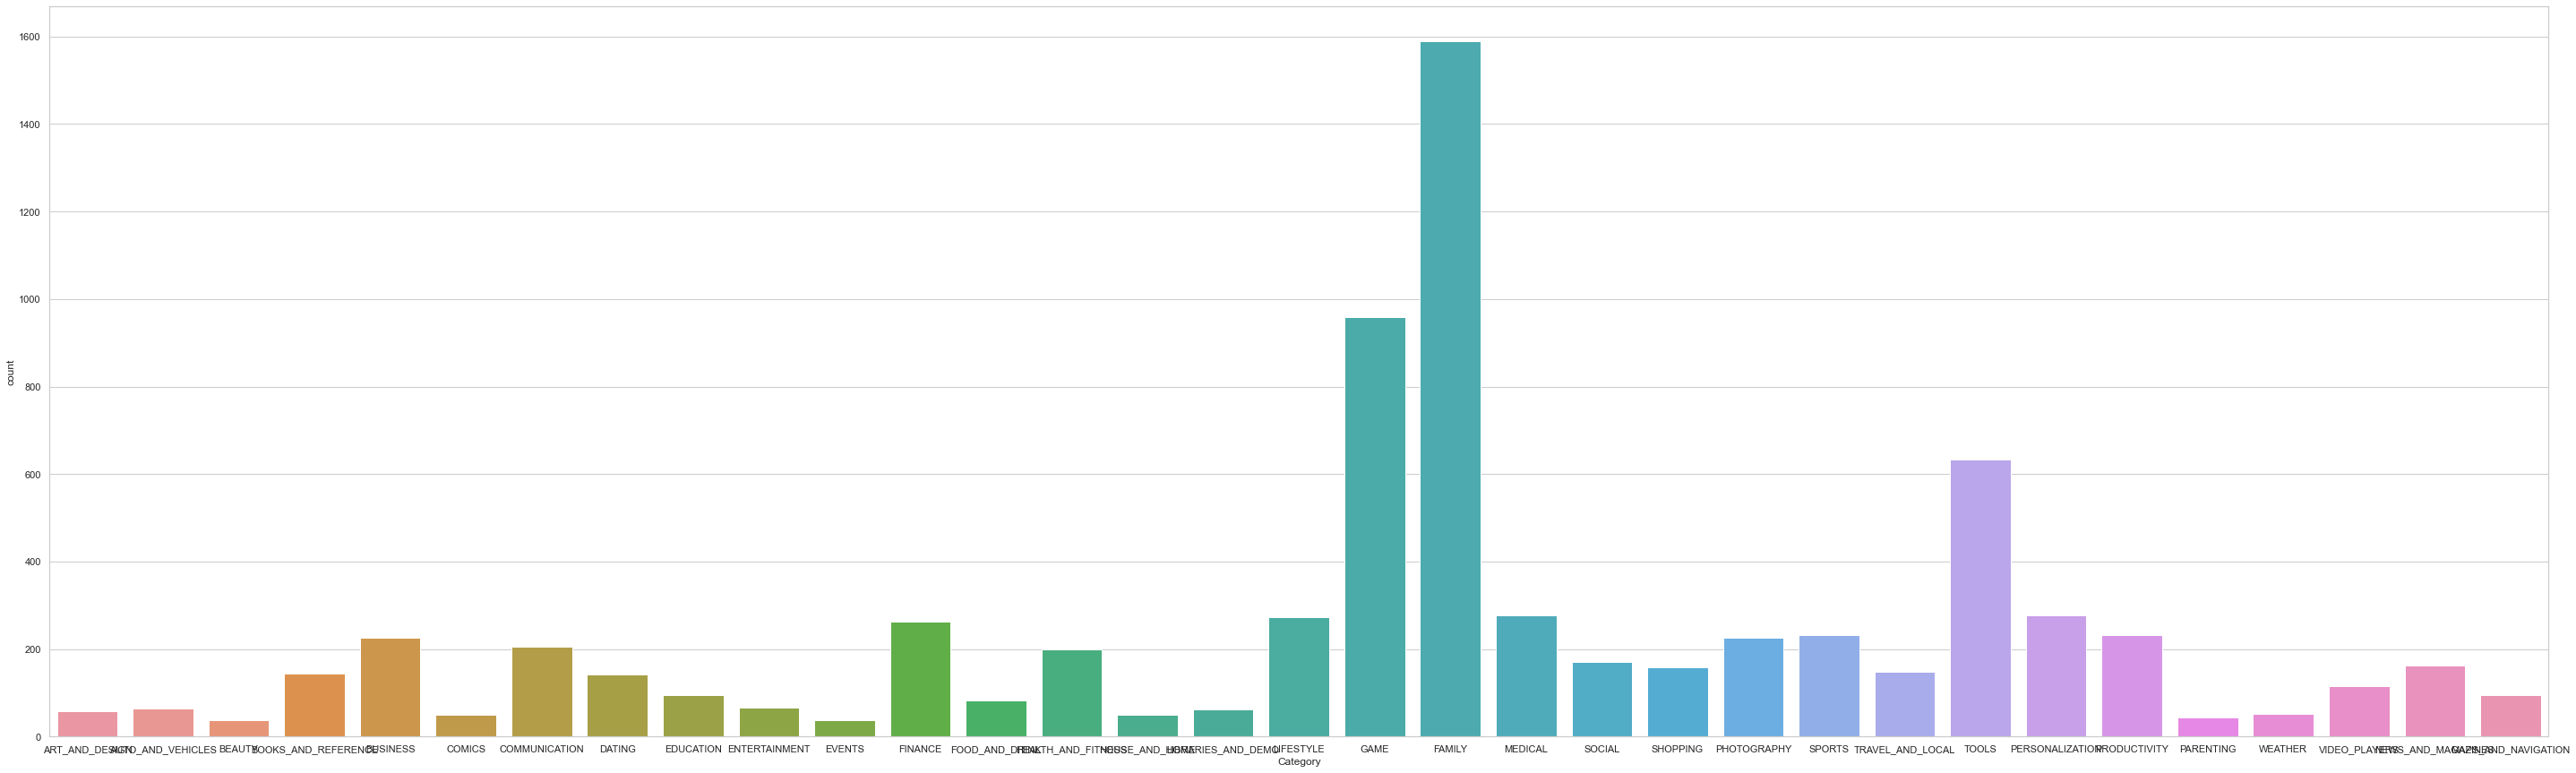

In [371]:
#part a
plt.figure(figsize = (50,15))
sns.countplot(x = 'Category', data = google_df)

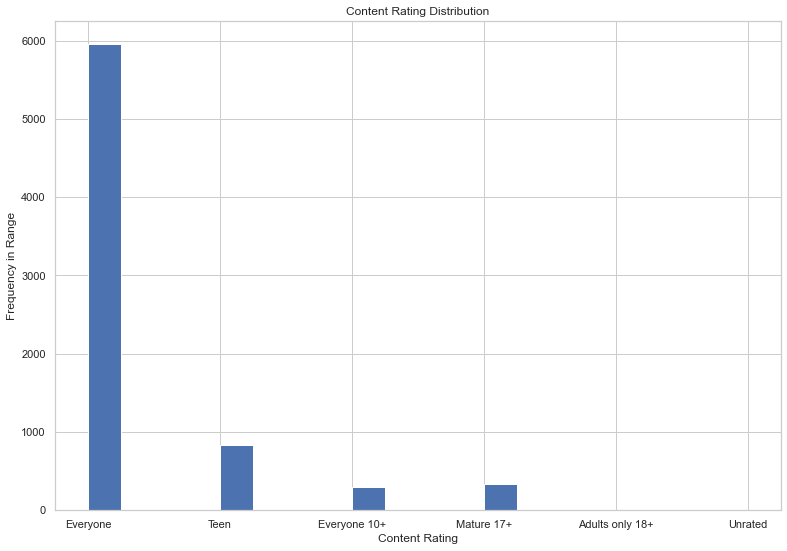

In [372]:
#part a second graph
plt.figure(figsize = (13,9))
plt.hist(google_df['Content Rating'], bins = 20)
plt.title("Content Rating Distribution")
plt.xlabel('Content Rating')
plt.ylabel('Frequency in Range')
plt.show()

<AxesSubplot:xlabel='Type', ylabel='count'>

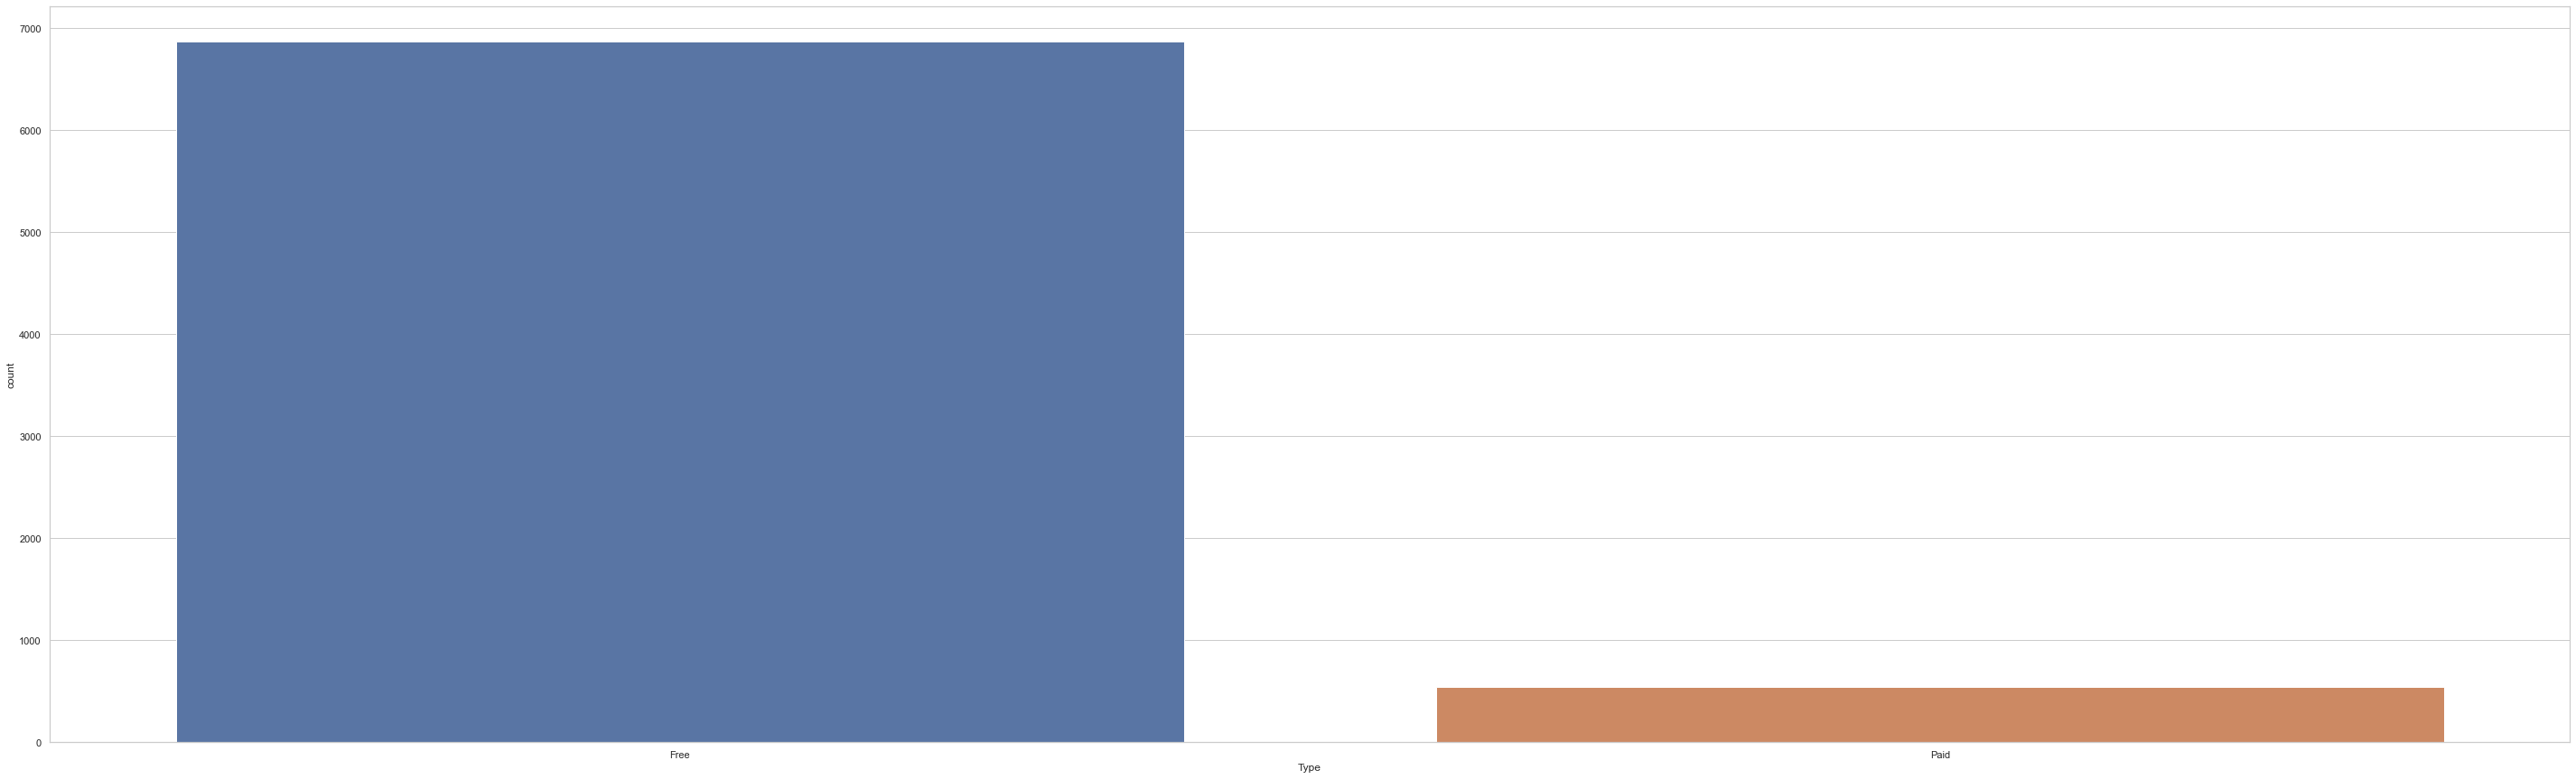

In [373]:
#part b
plt.figure(figsize = (50,15))
sns.countplot(x = 'Type', data = google_df)

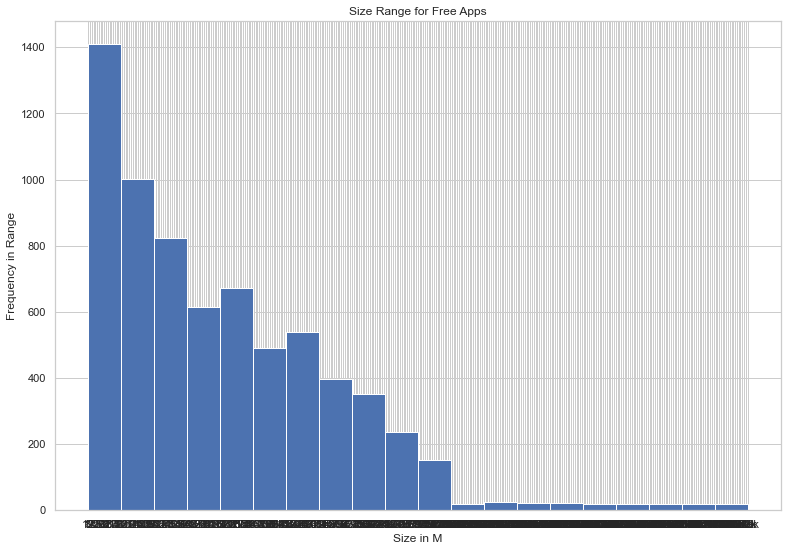

In [374]:
#part c
free_apps = google_df.drop(google_df.index[np.where(google_df['Type'] == 'Paid')])
paid_apps = google_df.drop(google_df.index[np.where(google_df['Type'] == 'Free')])

plt.figure(figsize = (13,9))
plt.hist(free_apps['Size in M'], bins = 20)
plt.title("Size Range for Free Apps")
plt.xlabel('Size in M')
plt.ylabel('Frequency in Range')
plt.show()

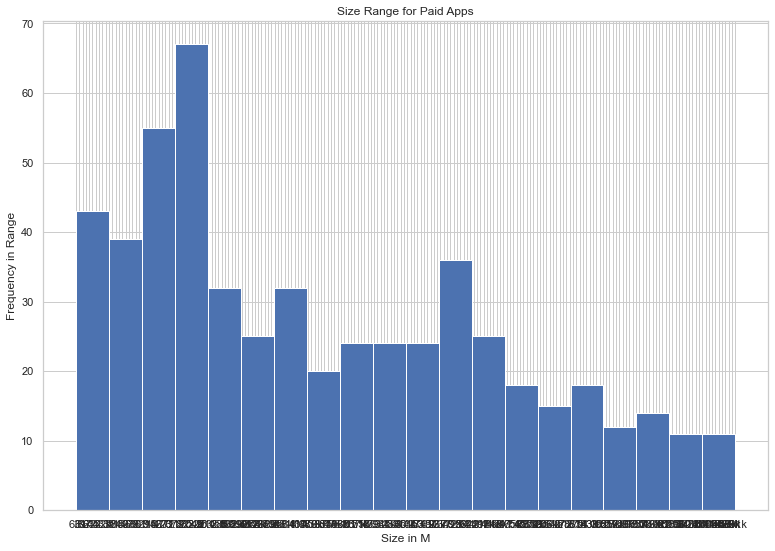

In [375]:
plt.figure(figsize = (13,9))
plt.hist(paid_apps['Size in M'], bins = 20)
plt.title("Size Range for Paid Apps")
plt.xlabel('Size in M')
plt.ylabel('Frequency in Range')
plt.show()

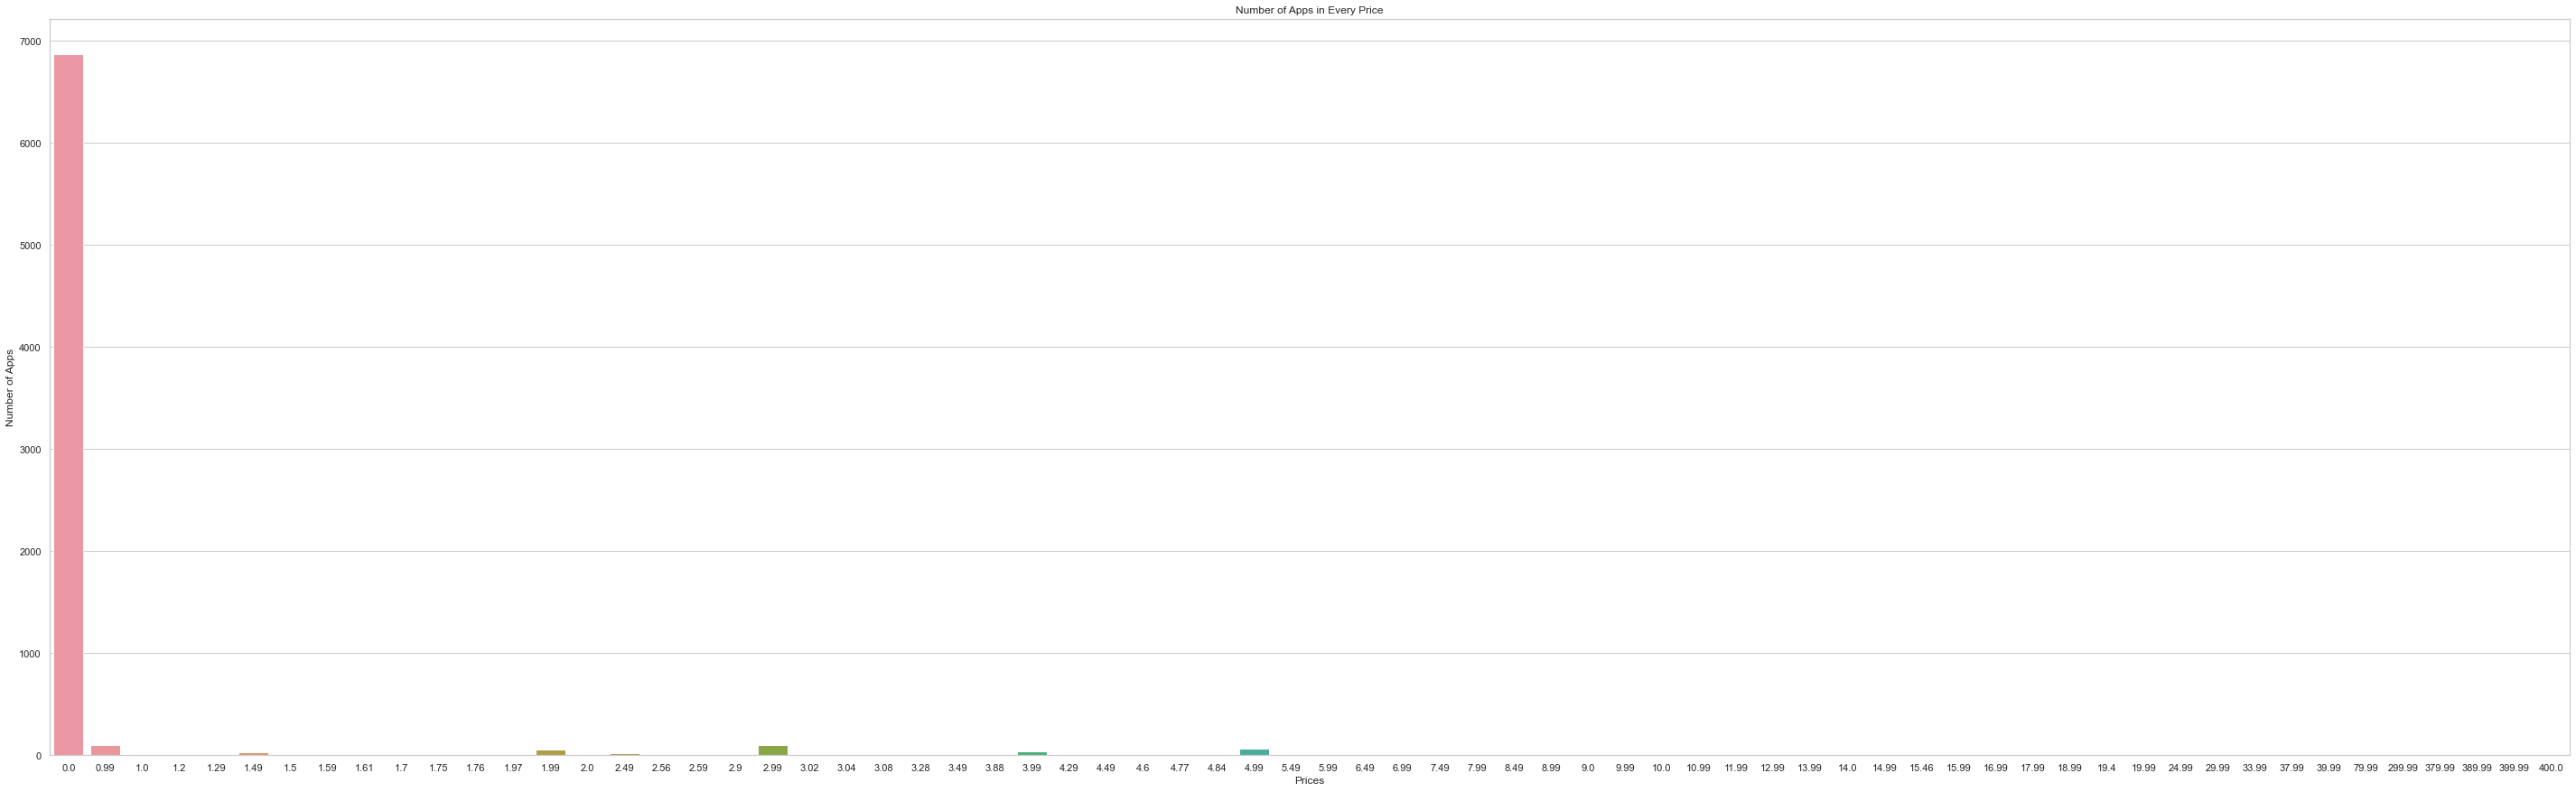

In [376]:
#part d
plt.figure(figsize = (50,15))
sns.countplot(x = 'Price', data = google_df)
plt.title("Number of Apps in Every Price")
plt.xlabel('Prices')
plt.ylabel('Number of Apps')
plt.show()

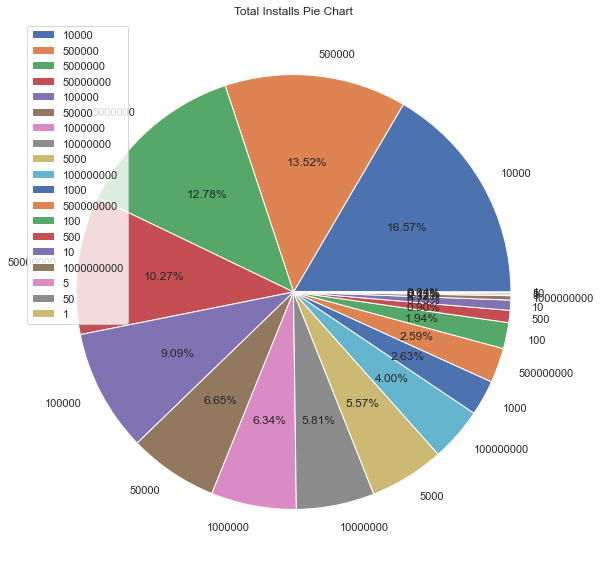

In [377]:
#part e
plt.figure(figsize = (10,10))
plt.pie(google_df['Installs'].value_counts(), labels = google_df['Installs'].unique(), autopct = '%1.2f%%')
plt.legend()
plt.title("Total Installs Pie Chart")
plt.show()

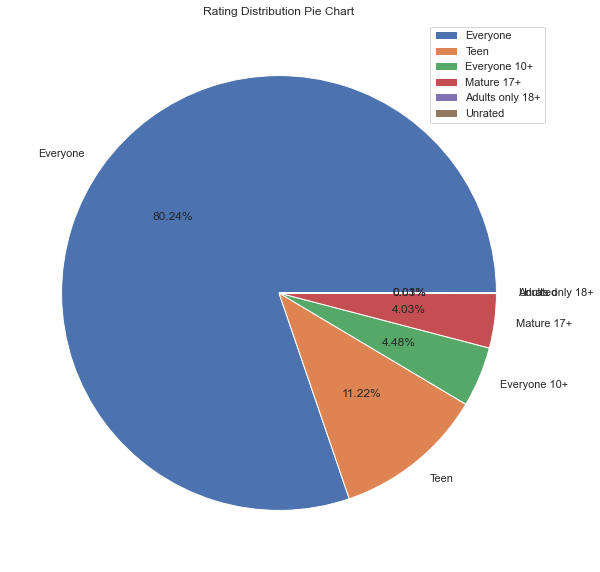

In [378]:
#part e 
plt.figure(figsize = (10,10))
plt.pie(google_df['Content Rating'].value_counts(), labels = google_df['Content Rating'].unique(), autopct = '%1.2f%%')
plt.legend()
plt.title("Rating Distribution Pie Chart")
plt.show()

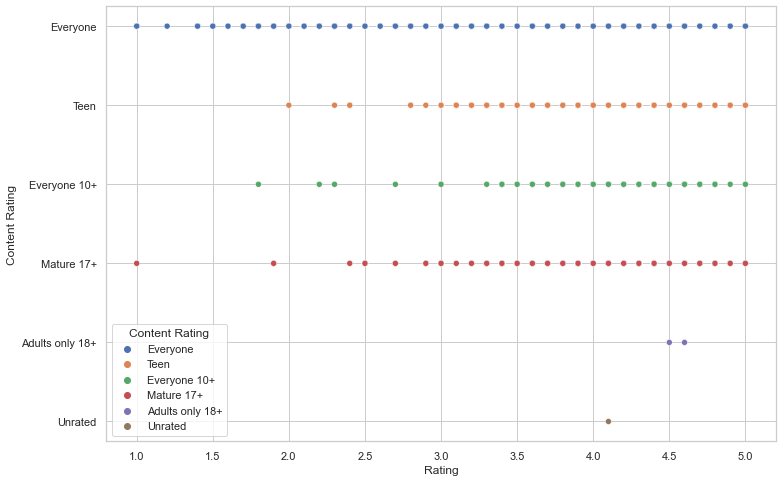

In [379]:
#part g
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Rating', y = 'Content Rating', data = google_df, hue = 'Content Rating')
plt.show()

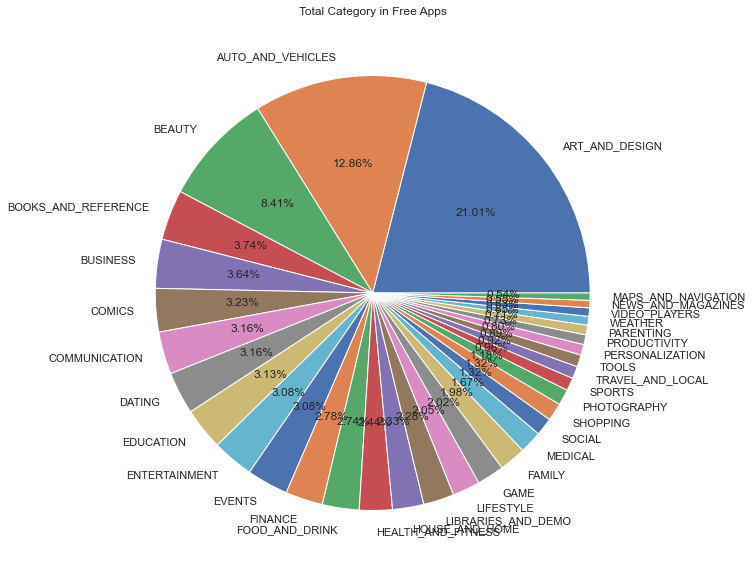

In [380]:
#part h
plt.figure(figsize = (10,10))
plt.pie(free_apps['Category'].value_counts(), labels = free_apps['Category'].unique(), autopct = '%1.2f%%')
plt.title("Total Category in Free Apps")
plt.show()

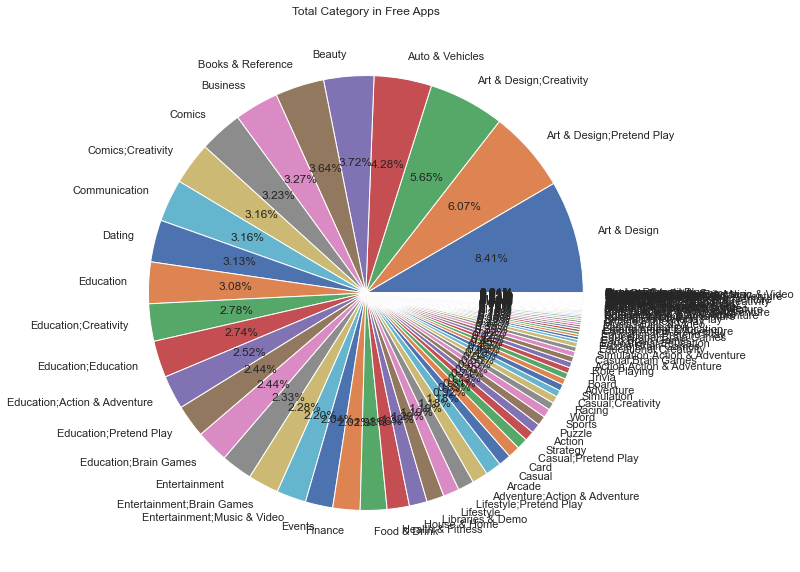

In [381]:
#part i
plt.figure(figsize = (10,10))
plt.pie(free_apps['Genres'].value_counts(), labels = free_apps['Genres'].unique(), autopct = '%1.2f%%')
plt.title("Total Category in Free Apps")
plt.show()

In [382]:
#part j
google_df['Rating'] = pd.to_numeric(google_df['Rating'])

plt.figure(figsize = (30,8))
sns.scatterplot(x = 'App', y = 'Rating', data = google_df)
plt.show()


"\nplt.figure(figsize = (30,8))\nsns.scatterplot(x = 'App', y = 'Rating', data = google_df)\nplt.show()\n"

<AxesSubplot:xlabel='Category', ylabel='Rating'>

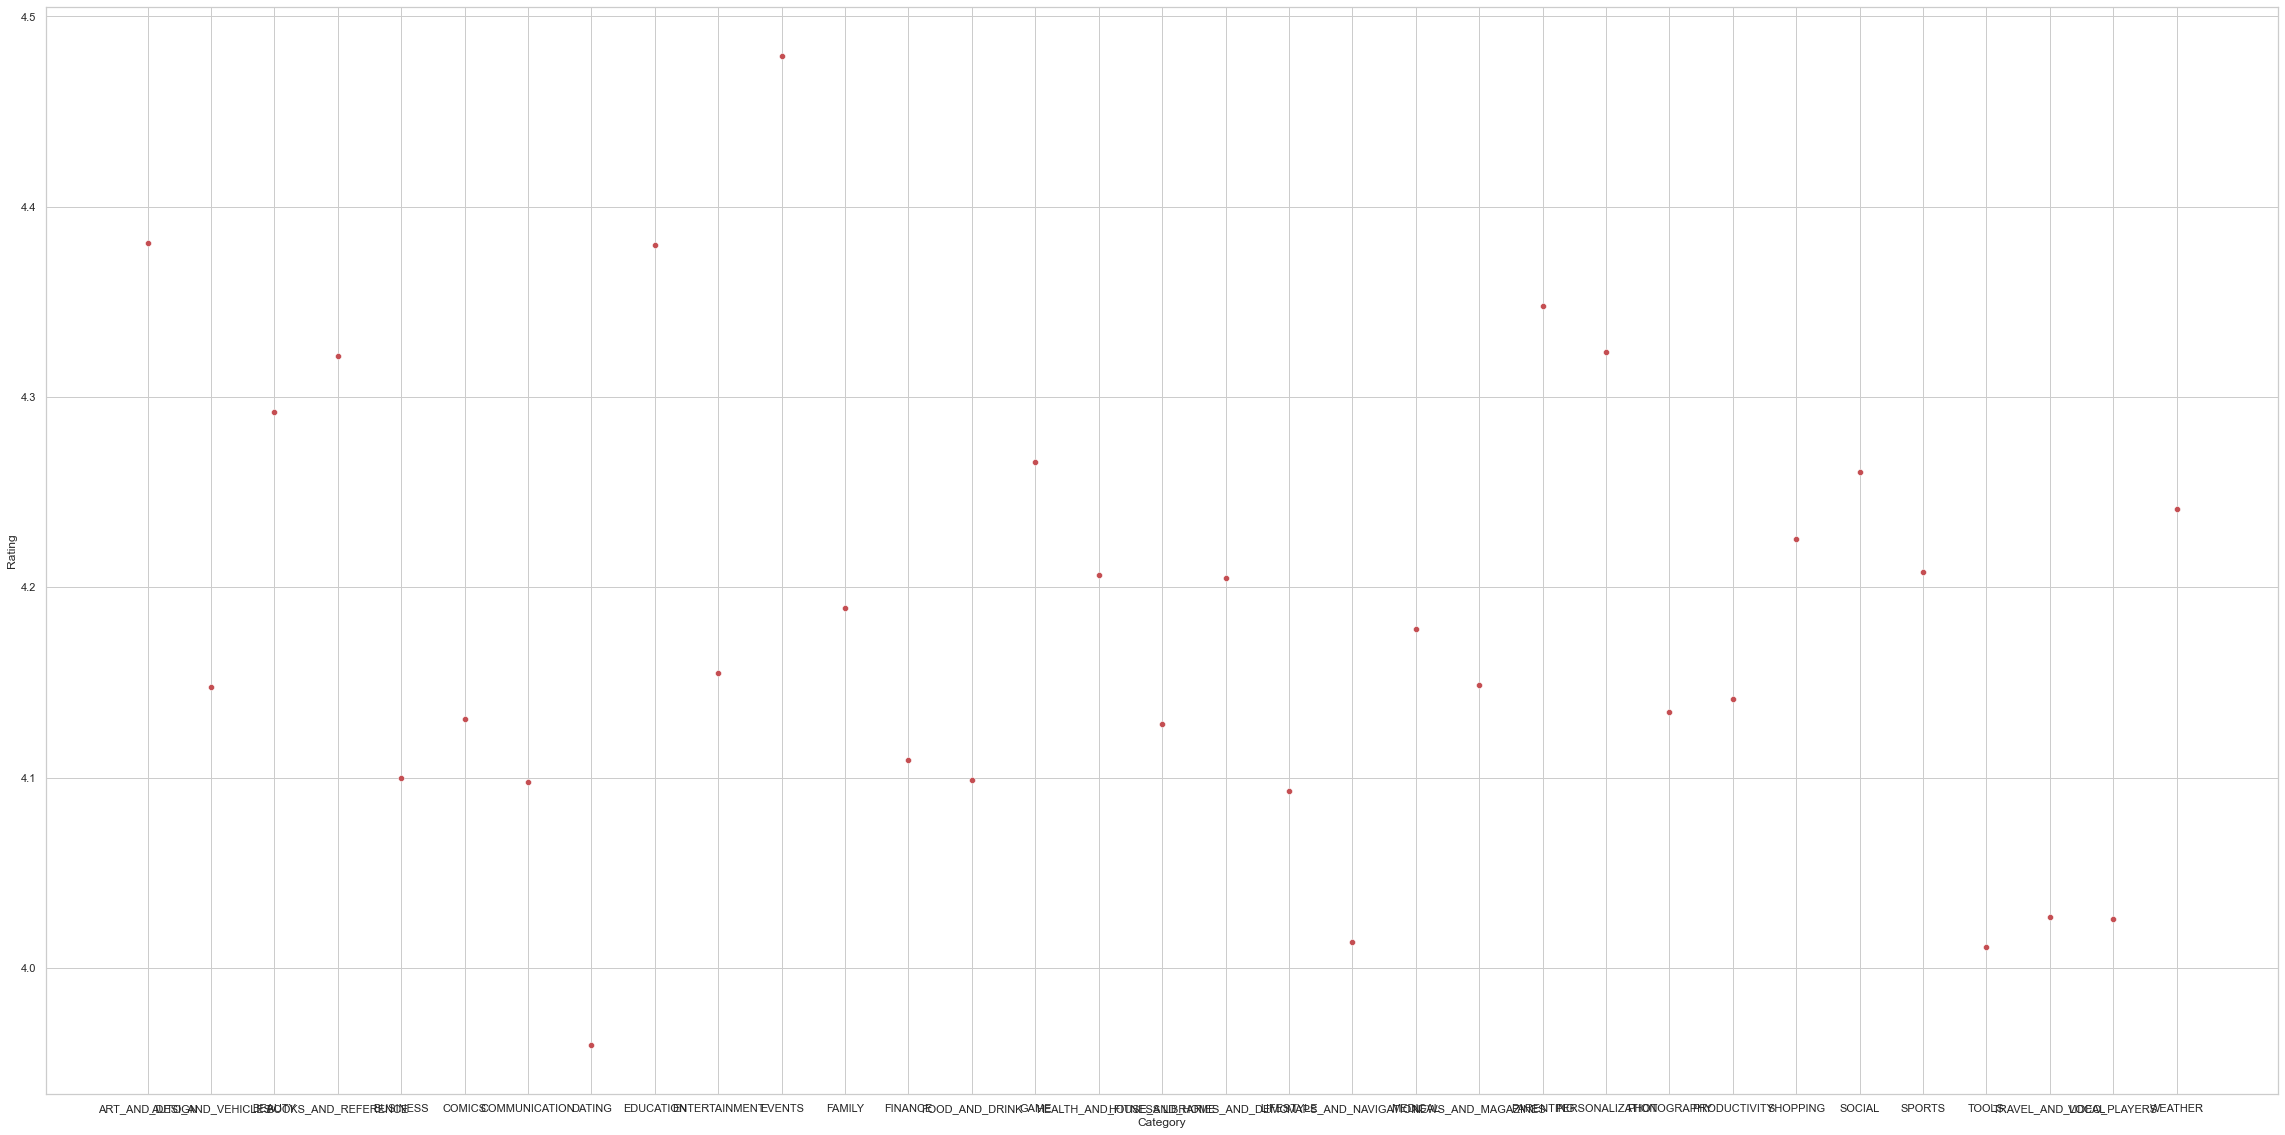

In [383]:
#part k
x = google_df.groupby(['Category'])
mean_df = x.mean()
category_name = mean_df.index
mean_df.set_index('Price', inplace = True)
mean_df['Category'] = category_name

plt.figure(figsize = (40,20))
sns.scatterplot(x = mean_df['Category'], y = mean_df['Rating'], color = 'r')

### Indian Food

In [384]:
indianfood_df = pd.read_csv('C:/Users/Rock Shi/Downloads/indian_food.csv')

#### Question 1

In [385]:
indianfood_df.drop_duplicates(inplace = True)
indianfood_df['prep_time'].replace(-1, np.nan, inplace = True)
indianfood_df['cook_time'].replace(-1, np.nan, inplace = True)
indianfood_df['ingredients'].replace('-1', np.nan, inplace = True)
indianfood_df['region'].replace('-1', np.nan, inplace = True)
indianfood_df['flavor_profile'].replace('-1', np.nan, inplace = True)
indianfood_df.dropna(inplace = True)

indianfood_df['no_of_ingredients'] = indianfood_df.ingredients.map(lambda x: [i.strip() for i in x.split(",")])
indianfood_df['# ingredients'] = indianfood_df.no_of_ingredients.apply(len)
display(indianfood_df)
    


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,no_of_ingredients,# ingredients
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,"[Maida flour, yogurt, oil, sugar]",4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,"[Gram flour, ghee, sugar]",3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,"[Carrots, milk, sugar, ghee, cashews, raisins]",6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,"[Flour, ghee, kewra, milk, clarified butter, s...",10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,"[Milk powder, plain flour, baking powder, ghee...",8
...,...,...,...,...,...,...,...,...,...,...,...
247,Prawn malai curry,"Coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15.0,50.0,spicy,main course,West Bengal,East,"[Coconut milk, prawns, garlic, turmeric, sugar]",5
249,Shukto,"Green beans, bitter gourd, ridge gourd, banana...",vegetarian,10.0,20.0,spicy,main course,West Bengal,East,"[Green beans, bitter gourd, ridge gourd, banan...",5
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East,"[Glutinous rice, black sesame seeds, gur]",3
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West,"[Coconut milk, egg yolks, clarified butter, al...",4


#### Question 2

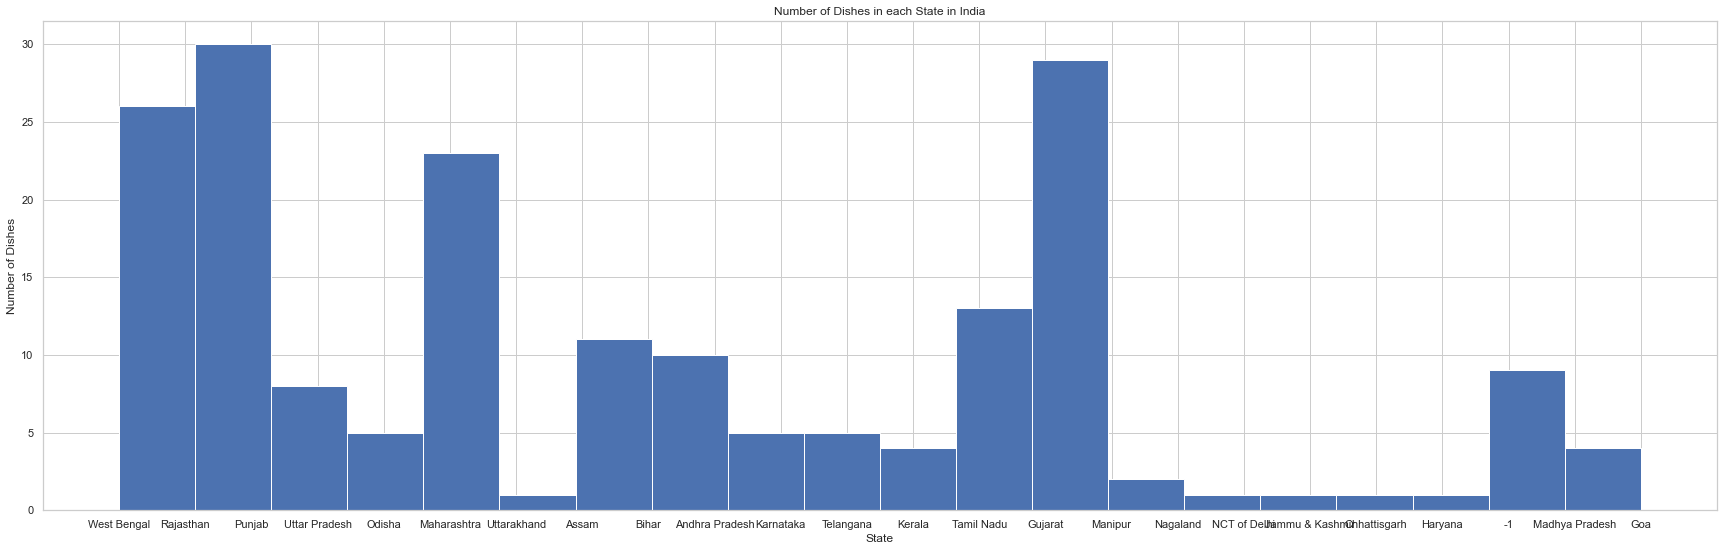

In [386]:
#part a
plt.figure(figsize = (30,9))
plt.hist(indianfood_df['state'], bins = 20)
plt.title("Number of Dishes in each State in India")
plt.xlabel('State')
plt.ylabel('Number of Dishes')
plt.show()

<AxesSubplot:xlabel='flavor_profile', ylabel='count'>

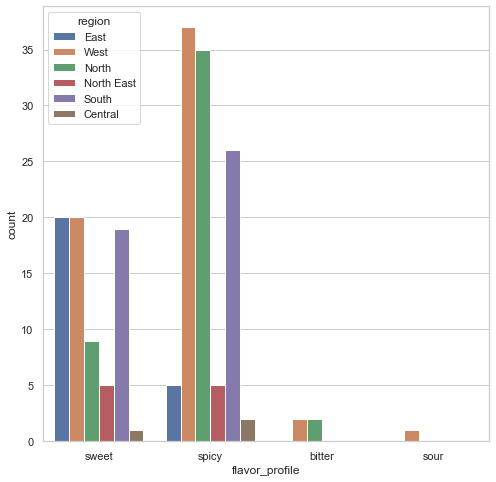

In [387]:
#part b
plt.figure(figsize = (8,8))
sns.countplot(x = 'flavor_profile', data = indianfood_df, hue = 'region')

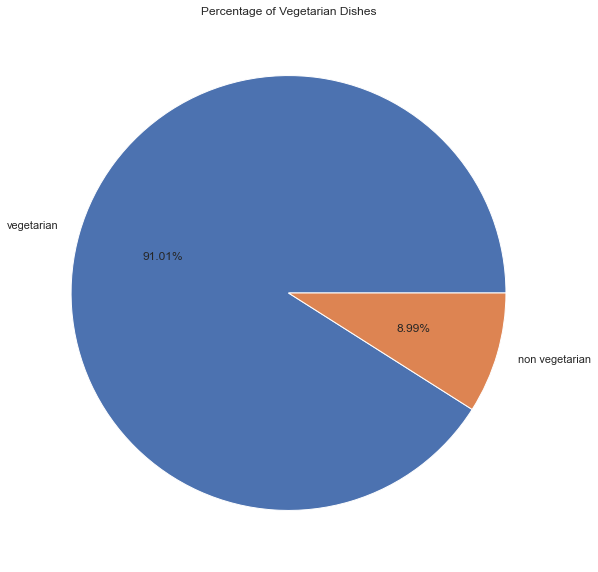

In [388]:
#part c
plt.figure(figsize = (10,10))
plt.pie(indianfood_df['diet'].value_counts(), labels = indianfood_df['diet'].unique(), autopct = '%1.2f%%')
plt.title("Percentage of Vegetarian Dishes")
plt.show()

<AxesSubplot:xlabel='cook_time', ylabel='count'>

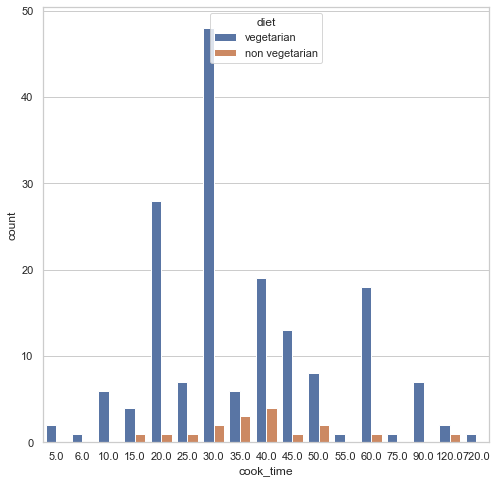

In [389]:
#part d
plt.figure(figsize = (8,8))
sns.countplot(x = 'cook_time', data = indianfood_df, hue = 'diet')

<AxesSubplot:xlabel='state', ylabel='count'>

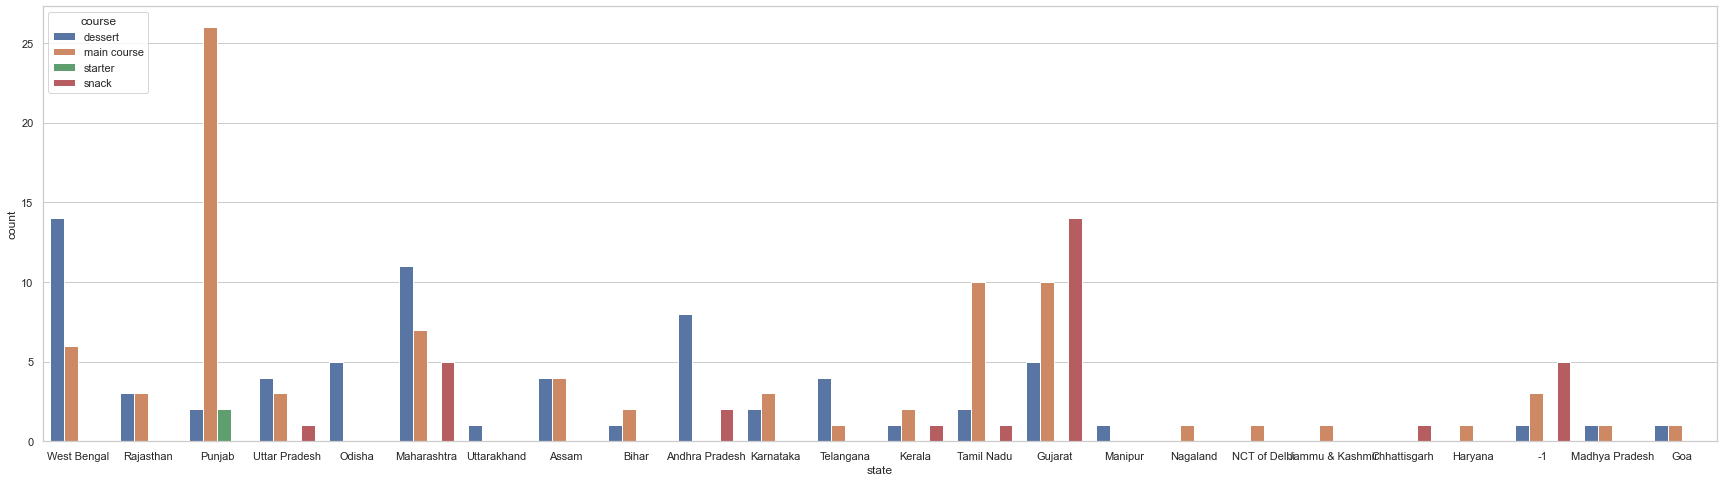

In [390]:
#part e
plt.figure(figsize = (30,8))
sns.countplot(x = 'state', data = indianfood_df, hue = 'course')

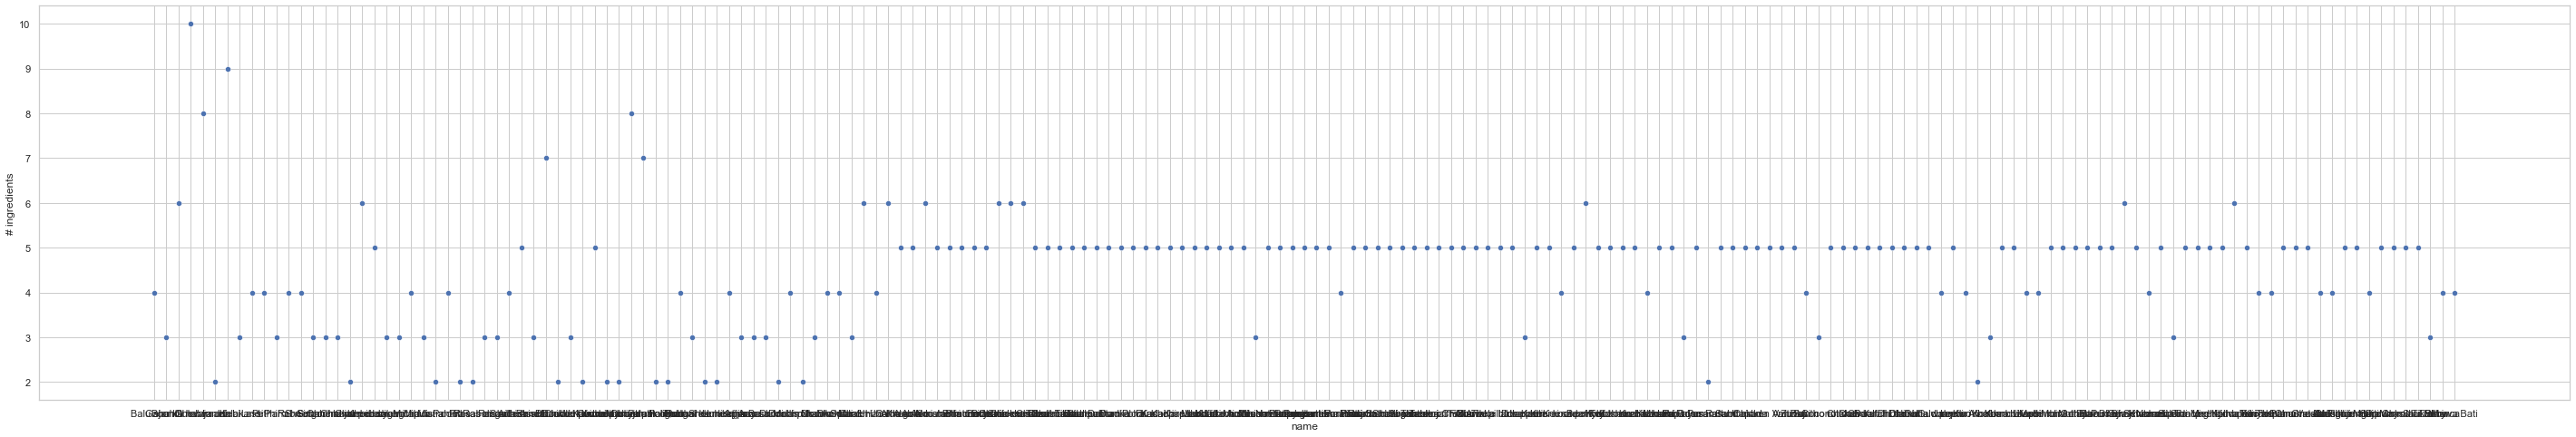

In [391]:
#part f
plt.figure(figsize = (50,8))
sns.scatterplot(x = 'name', y = '# ingredients', data = indianfood_df)
plt.show()

<AxesSubplot:xlabel='prep_time', ylabel='cook_time'>

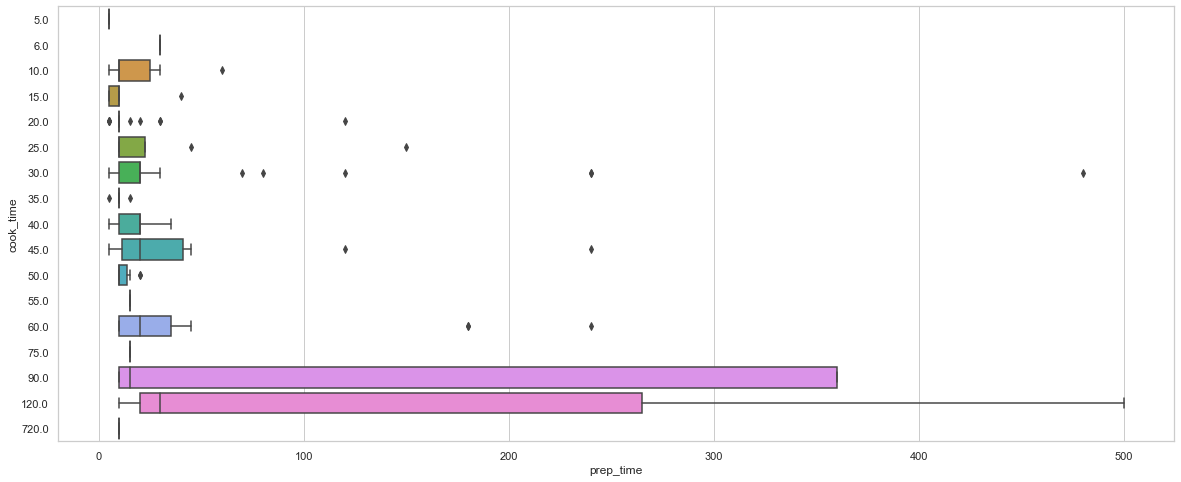

In [392]:
#part g
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
sns.boxplot(x = 'prep_time', y = 'cook_time', data = indianfood_df, orient = 'h')

<AxesSubplot:xlabel='state', ylabel='count'>

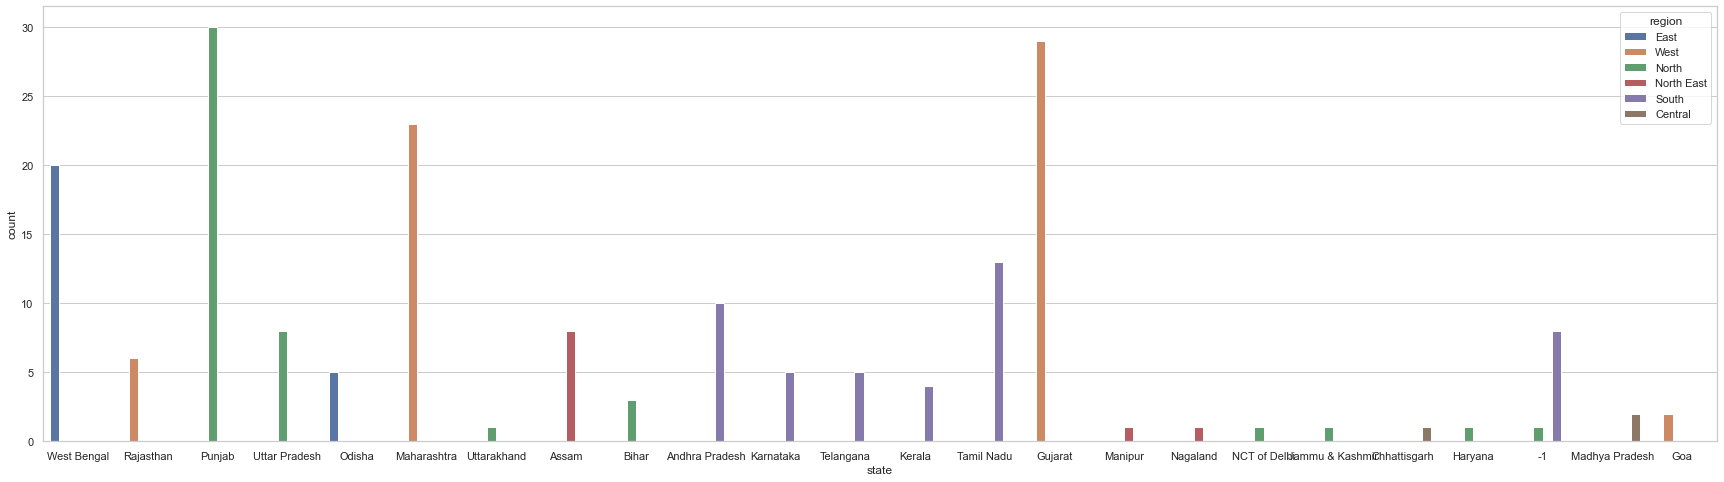

In [393]:
#part h
plt.figure(figsize = (30,8))
sns.countplot(x = 'state', data = indianfood_df, hue = 'region')